In [12]:
import consMDP
import reachability
import importlib
import dot
importlib.reload(consMDP)
importlib.reload(reachability)
importlib.reload(dot)
dot.dotpr = "neato"

## Almost sure reachability example -- basic
 * it should distinguish between positive and almost-sure reachability:
   - target that does not reach any other target
   - target reachable by an action that can lead to a dead-end for a low cost (and maybe has another way to reach the target surely for a high cost) 
 * the good path goes via at least one reload
   - the reload should be enabled by the same state

For capacity 11 the reload 7 gets disabled for positive reachability. For almost sure, we need at least 22.

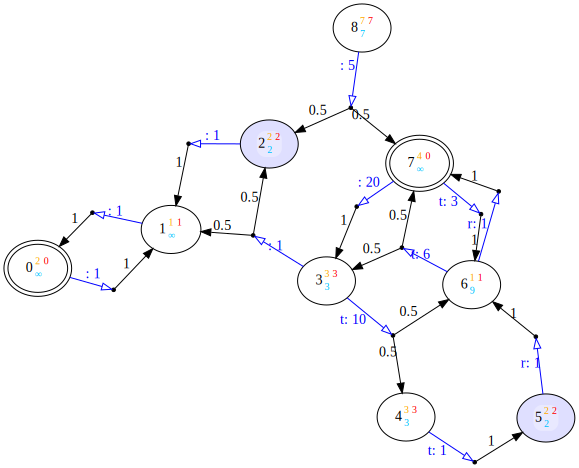

In [13]:
from reachability_example import m, targets
m.get_positiveReachability(targets, 11)
m

In [6]:
%%writefile reachability_examples.py
#!/usr/bin/env python

import consMDP
import reachability
import importlib
import dot
importlib.reload(consMDP)
importlib.reload(reachability)
importlib.reload(dot)


# ## Almost sure reachability example
#  * it should distinguish between positive and almost-sure reachability:
#    - target that does not reach any other target
#    - target reachable by an action that can lead to a dead-end for a low cost (and maybe has another way to reach the target surely for a high cost) 
#  * the good path goes via at least one reload
#    - the reload should be enabled by the same state
# 
# Capacity should be 25
def basic():
    dot.dotpr = "neato"
    m = consMDP.ConsMDP()

    m.new_states(9)
    for s in [0, 7]:
        m.set_reload(s)

    m.add_action(0, {1:1}, "", 1)
    m.add_action(1, {0:1}, "", 1)
    m.add_action(2, {1:1}, "", 1)
    m.add_action(3, {2:.5, 1:.5}, "", 1)
    m.add_action(3, {4:.5, 6:.5},"t", 10)
    m.add_action(4, {5:1}, "t", 1)
    m.add_action(5, {6:1}, "r", 1)
    m.add_action(6, {3:.5, 7:.5}, "t", 6)
    m.add_action(6, {7:1}, "r", 1)
    m.add_action(7, {3:1}, "", 20)
    m.add_action(7, {6:1}, "t", 3)
    m.add_action(8, {7:.5, 2:.5}, "", 5)

    targets = set([2,5])
    
    return m, targets

def little_alsure():
    dot.dotpr = "dot"
    m = consMDP.ConsMDP()
    m.new_states(4)
    for r in [3]:
        m.set_reload(r)
    m.add_action(0, {1:.5, 2:.5}, "t", 2)
    m.add_action(1,{3:1}, "r", 1)
    m.add_action(2,{3:1}, "r", 2)
    m.add_action(3,{3:1}, "r", 3)
    m.add_action(0,{1:.5, 3:.5},"pos",1)

    targets=set([1,2])
    return m, targets

Overwriting reachability_examples.py


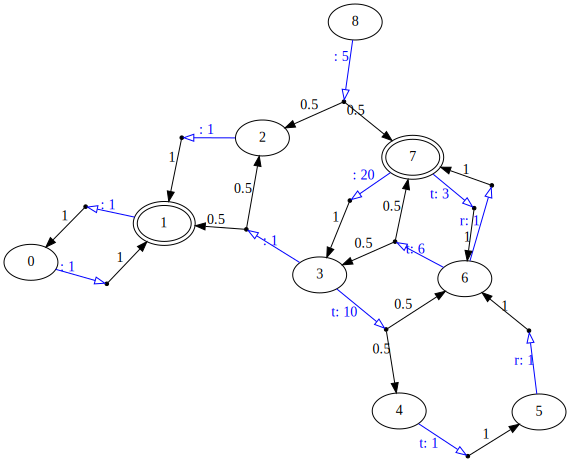

{2, 5}

In [20]:
import reachability_examples
m, t = reachability_examples.basic()
display(m, targets)

In [18]:
# %load -s basic reachability_examples.py
def basic():
    dot.dotpr = "neato"
    m = consMDP.ConsMDP()

    m.new_states(9)
    for s in [0, 7]:
        m.set_reload(s)

    m.add_action(0, {1:1}, "", 1)
    m.add_action(1, {0:1}, "", 1)
    m.add_action(2, {1:1}, "", 1)
    m.add_action(3, {2:.5, 1:.5}, "", 1)
    m.add_action(3, {4:.5, 6:.5},"t", 10)
    m.add_action(4, {5:1}, "t", 1)
    m.add_action(5, {6:1}, "r", 1)
    m.add_action(6, {3:.5, 7:.5}, "t", 6)
    m.add_action(6, {7:1}, "r", 1)
    m.add_action(7, {3:1}, "", 20)
    m.add_action(7, {6:1}, "t", 3)
    m.add_action(8, {7:.5, 2:.5}, "", 5)

    targets = set([2,5])
    
    return m, targets


## Little almost sure example
We have a choice to win almost-sure, but we need to set safe_value of targets to non-∞.

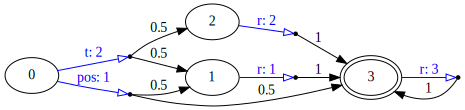

In [21]:
reachability_examples.little_alsure()[0]

In [22]:
reachability_examples.little_alsure()[1]

{1, 2}

In [23]:
# %load -s little_alsure reachability_examples.py
def little_alsure():
    dot.dotpr = "neato"
    dot.dotpr = "dot"
    m = consMDP.ConsMDP()
    m.new_states(4)
    for r in [3]:
        m.set_reload(r)
    m.add_action(0, {1:.5, 2:.5}, "t", 2)
    m.add_action(1,{3:1}, "r", 1)
    m.add_action(2,{3:1}, "r", 2)
    m.add_action(3,{3:1}, "r", 3)
    m.add_action(0,{1:.5, 3:.5},"pos",1)

    targets=set([1,2])
    return m, targets
